# Objective

To supplement fif=gures for the thesis report. This notebook was created to not clutter the main analysis Jupyter Notebook

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import contextily as cx # for base map


# __1. Show  Study Boundary Shapefile__

In [7]:
# read shapefile
study_boundary = gpd.read_file('Study Area Boundary Polygon\Double Province Boundary\Province_Boundary.shp')
# Reproject to EPSG 4326 (WGS 84)
study_boundary = study_boundary.to_crs(epsg=4326)

Text(0.9, 0.88, 'N')

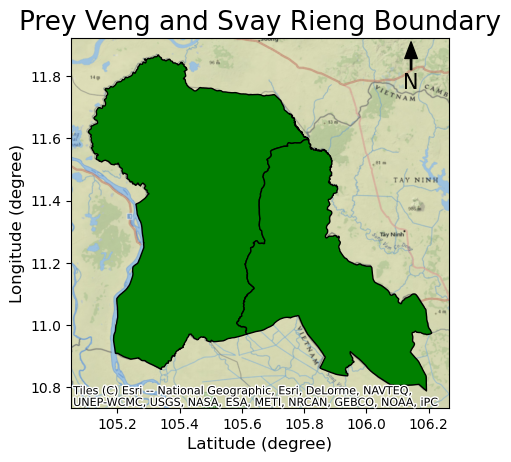

In [21]:
fig, ax = plt.subplots()
study_boundary.plot(ax = ax, edgecolor = 'k', facecolor = 'Green')
cx.add_basemap(ax, crs = study_boundary.crs.to_string(),
               source = cx.providers.Esri.NatGeoWorldMap)


# aesthetics
ax.set_ylabel('Longitude (degree)', fontsize = 12)
ax.set_xlabel('Latitude (degree)', fontsize = 12)
ax.set_title('Prey Veng and Svay Rieng Boundary', fontsize = 19)

x, y, arrow_length = 0.9, 0.99, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=9),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)

In [5]:
# read shape file for Cambodia
cambodia_provinces = gpd.read_file('Study Area Boundary Polygon\Basic map of Cambodia (2014)\province\khm_admbnda_adm1_gov.shp')
# Reproject to EPSG 4326 (WGS 84)
cambodia_provinces = cambodia_provinces.to_crs(epsg=4326)

Text(0.04, 0.88, 'N')

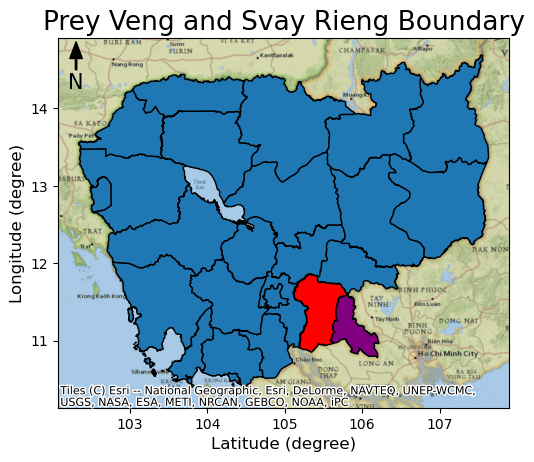

In [44]:
fig, ax = plt.subplots()
cambodia_provinces.plot(ax = ax, edgecolor = 'k', label = 'Cambodia Provinces', legend= True)
cambodia_provinces.loc[3:3].plot(ax = ax, edgecolor = 'k', label = 'Prey Veng', facecolor = 'Red', legend = True)
cambodia_provinces.loc[4:4].plot(ax = ax, edgecolor = 'k', label = 'Svey Rieng', facecolor = 'Purple', legend = True)


cx.add_basemap(ax, crs = cambodia_provinces.crs.to_string(),
               source = cx.providers.Esri.NatGeoWorldMap)

# aesthetics
ax.set_ylabel('Longitude (degree)', fontsize = 12)
ax.set_xlabel('Latitude (degree)', fontsize = 12)
ax.set_title('Prey Veng and Svay Rieng Boundary', fontsize = 19)
x, y, arrow_length = 0.04, 0.99, 0.11
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=1, headwidth=9),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes)